<a href="https://colab.research.google.com/github/jseeun00/ESAA_2021-2/blob/main/10%EC%A3%BC%EC%B0%A8_SVM_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

**2. 서포트 벡터가 무엇인가요?**

**답** : 결정경계는 도로 경계에 위치한 샘플에 의해 전적으로 결정되는데 이러한 샘플을 서포트 벡터라고 한다. 도로 바깥쪽에 샘플을 더 추가해도 결정 경계에는 아무런 영향을 미치지 않는다.



**3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?**

**답** : (206pg) SVM은 특성의 스케일에 민감하기 때문이다. 예를 들어, 수직축의 스케일이 수평축의 스케일보다 훨씬 큰 경우, 결정 경계는 수평축에 거의 평행한다. 따라서 특성의 스케일을 조정해주면 결정 경계가 더 좋아지므로 입력값의 스케일이 중요하다.



**8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.**

In [28]:
# iris data를 로드하고 x,y를 지정해줍니다.
#(힌트: 핸즈온 머신러닝 교재 208쪽 참고)
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

In [10]:
C = 5 
alpha = 1 / (C * len(X))

In [17]:
# LinearSVC 학습하기
lin_svc = LinearSVC(loss='hinge',C=C,random_state=42)
svc = SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, tol=1e-3,alpha=alpha,
                       max_iter=100000, random_state=42)

# 위를 이용하여 데이터 스케일링 후 LinearSVC,SVC,SGDClassifier 구하기
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_svc.fit(X_scaled,y)
svc.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

print('LinearSVC :',lin_svc.intercept_,lin_svc.coef_)
print('SVC :',svc.intercept_,svc.coef_)
print('SGDClassifier :',sgd_clf.intercept_,sgd_clf.coef_)

LinearSVC : [-3.17999994] [[2.19679117 3.16730946]]
SVC : [-3.71602789] [[2.84187135 3.29080461]]
SGDClassifier : [-1.394] [[0.97438163 1.33109798]]


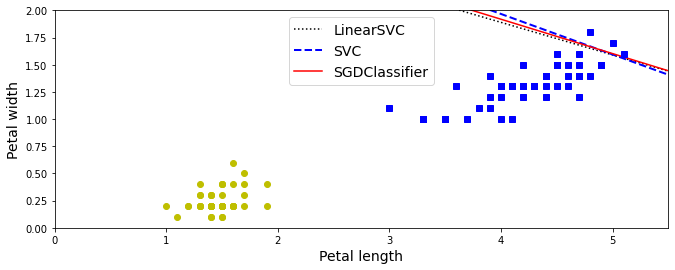

In [31]:
# 세 개 모델의 결정 경계를 그리기
# 먼저 결정 경계들의 기울기(W)와 편향(b)을 구함
w1 = -lin_svc.coef_[0,0] / lin_svc.coef_[0,1]
b1 = -lin_svc.intercept_[0] / lin_svc.coef_[0,1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 결계를 원본 스케일로 변환하기 -> 3개 모델의 범위를 맞추기 위함
line1 = scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2 = scaler.inverse_transform([[-10,-10*w2+b2],[10,10*w2+b2]])
line3 = scaler.inverse_transform([[-10,-10*w3+b3],[10,10*w3+b3]])

# 세 개의 결정 경계를 모두 그리기
plt.figure(figsize=(11,4))
plt.plot(line1[:,0], line1[:,1], "k:",label="LinearSVC")
plt.plot(line2[:,0],line2[:,1],"b--",linewidth=2,label="SVC")
plt.plot(line3[:,0],line3[:,1],'r-',label="SGDClassifier")

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.legend(loc='upper center',fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

# 아주 비슷한 결정 경계를 보인다. 

In [ ]:
# 너무 어려울 경우 https://leechamin.tistory.com/83 참고 